In [1]:
#carregando os pacotes
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from scikitplot.metrics import plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

In [2]:
#carregando os dados
dados = pd.read_csv('treino.csv',header=0)

In [3]:
#visualizando os dados
dados

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
109995,0,0.137396,59,1,0.448912,9600.0,10,0,2,0,0.0
109996,0,0.276964,46,0,0.491288,12224.0,19,0,4,0,4.0
109997,0,0.181257,43,0,0.382635,12000.0,13,0,2,0,2.0
109998,0,0.037699,86,0,0.248107,7000.0,14,0,2,0,1.0


In [4]:
dados.shape

(110000, 11)

In [5]:
# checando o tipo das variáveis
dados.dtypes

inadimplente                               int64
util_linhas_inseguras                    float64
idade                                      int64
vezes_passou_de_30_59_dias                 int64
razao_debito                             float64
salario_mensal                           float64
numero_linhas_crdto_aberto                 int64
numero_vezes_passou_90_dias                int64
numero_emprestimos_imobiliarios            int64
numero_de_vezes_que_passou_60_89_dias      int64
numero_de_dependentes                    float64
dtype: object

In [6]:
# primeira descrição estatística dos dados
dados.describe()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,8.823700e+04,110000.000000,110000.000000,110000.000000,110000.000000,107122.000000
mean,0.066645,5.929979,52.255636,0.424055,354.823589,6.637411e+03,8.445573,0.269955,1.019891,0.243891,0.757482
std,0.249408,252.301965,14.768241,4.240780,2074.140421,1.338395e+04,5.139026,4.217326,1.135989,4.204137,1.114670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030054,41.000000,0.000000,0.175016,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155936,52.000000,0.000000,0.366682,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.562806,63.000000,0.000000,0.866874,8.225000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
#checando se há valores faltantes
dados.isna().sum()

inadimplente                                 0
util_linhas_inseguras                        0
idade                                        0
vezes_passou_de_30_59_dias                   0
razao_debito                                 0
salario_mensal                           21763
numero_linhas_crdto_aberto                   0
numero_vezes_passou_90_dias                  0
numero_emprestimos_imobiliarios              0
numero_de_vezes_que_passou_60_89_dias        0
numero_de_dependentes                     2878
dtype: int64

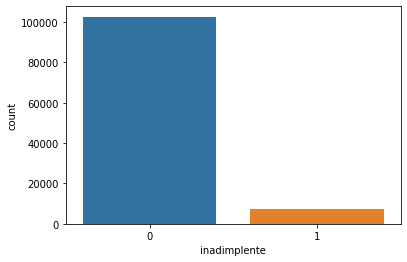

In [8]:
# checando a proporção da variável target
sns.countplot(dados['inadimplente']);

há uma desproporção grande na variável target que tratarei depois.

In [9]:
dados.salario_mensal.count()

88237

In [10]:
# tirando a média do salário para inputar nos valores nas
media_salario = dados['salario_mensal'].mean()

In [11]:
# tirando a média do número de dependentes para inputar nos valores nas
media_n_dependentes = dados['numero_de_dependentes'].mean()

In [12]:
dados['salario_mensal'].fillna(value=media_salario, inplace=True)

In [13]:
dados['numero_de_dependentes'].fillna(value=media_n_dependentes, inplace=True)

In [14]:
# verificando se ainda há valores missing
dados.isna().sum()

inadimplente                             0
util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

In [15]:
dados.shape

(110000, 11)

<Figure size 1440x1080 with 0 Axes>

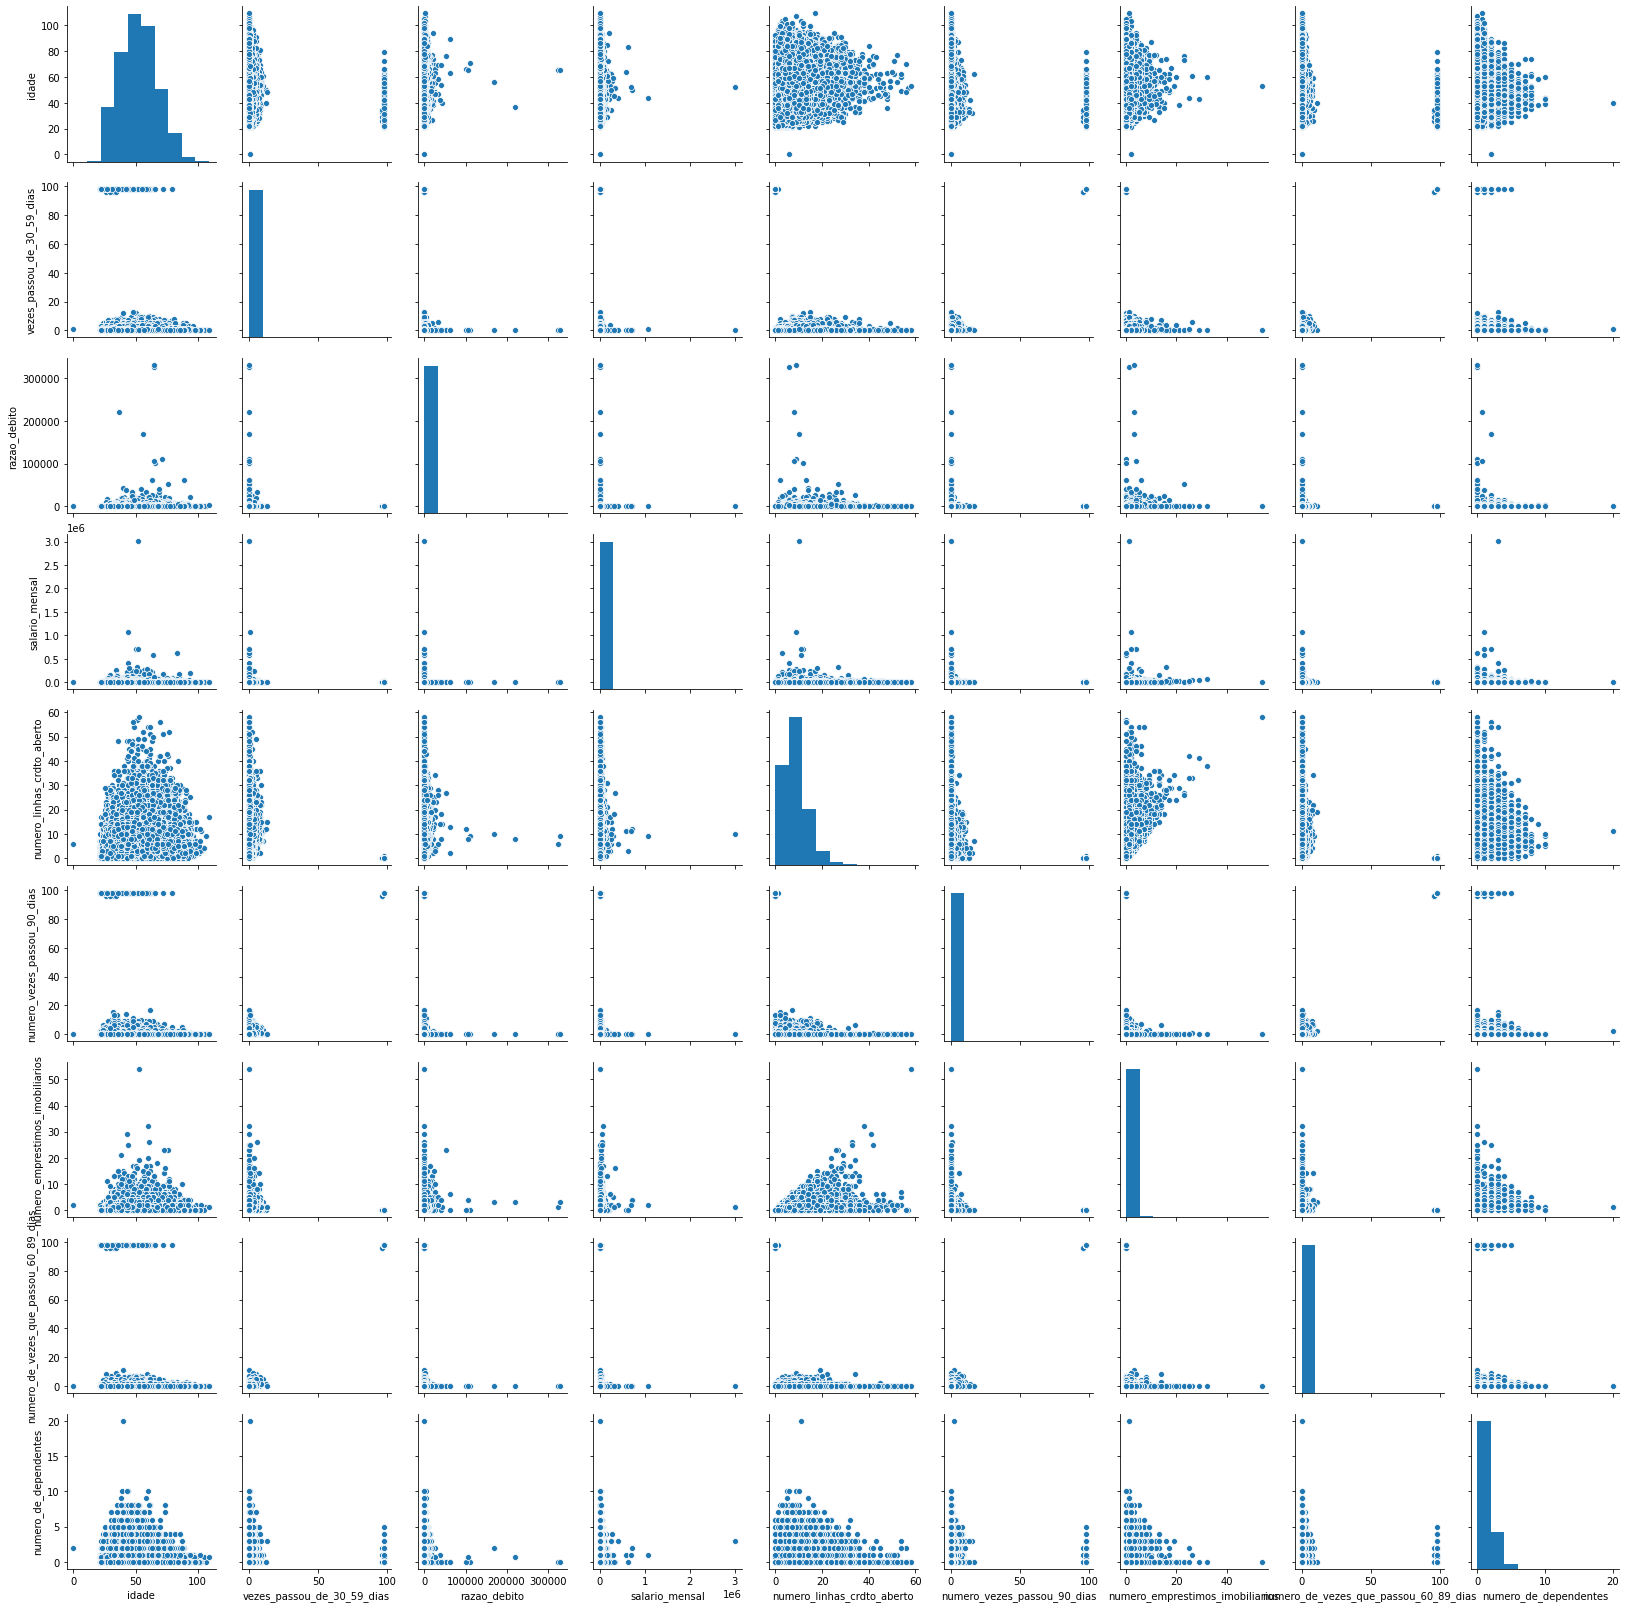

In [16]:
plt.figure(figsize=(20, 15));
sns.pairplot(dados.iloc[:,2:]);

In [17]:
# função de plot
def dias_que_passou(x):
    plt.figure(figsize=(17, 9));
    sns.countplot(x = x, hue = 'inadimplente', data = dados, palette = 'Greens_d');

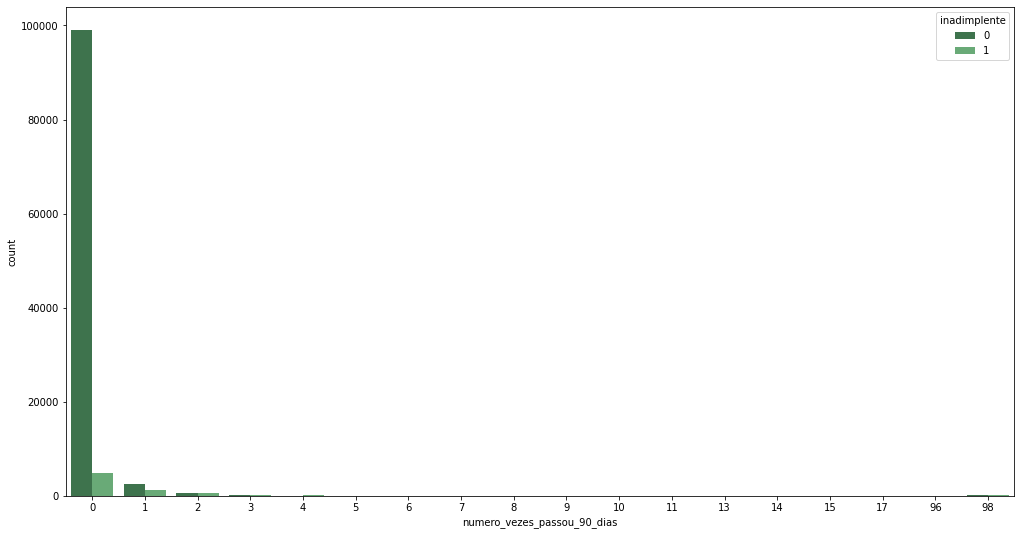

In [18]:
dias_que_passou('numero_vezes_passou_90_dias')

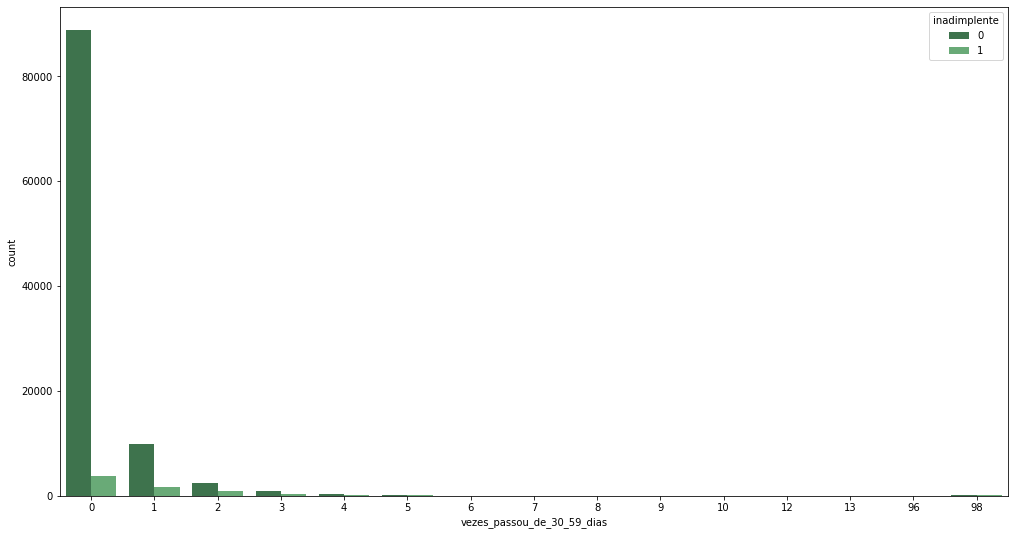

In [19]:
dias_que_passou('vezes_passou_de_30_59_dias')

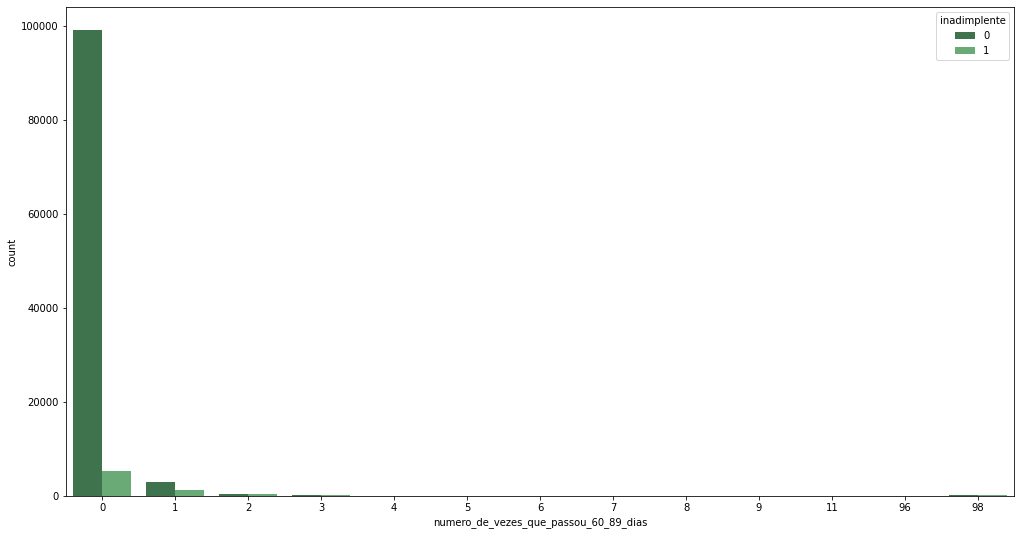

In [20]:
dias_que_passou('numero_de_vezes_que_passou_60_89_dias')

# Há registros em que o número de vezes que passaram de 90, 60_89, 30_59 dias foi 98,  provavelmente os que podem vir a ser inadimplentes

In [21]:
def contagem(x):    
    plt.figure(figsize=(17, 9));
    sns.countplot(x = x, data = dados);

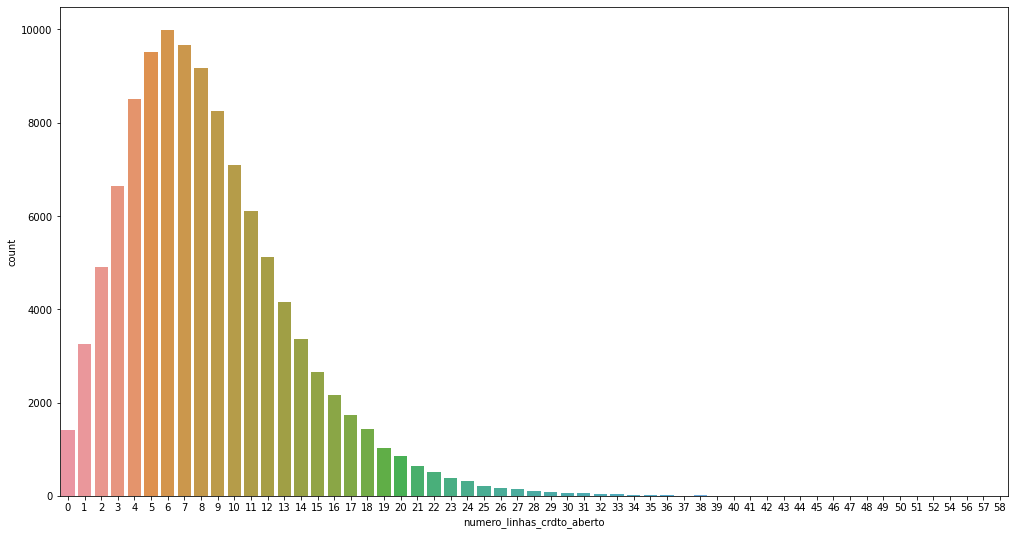

In [22]:
contagem('numero_linhas_crdto_aberto')

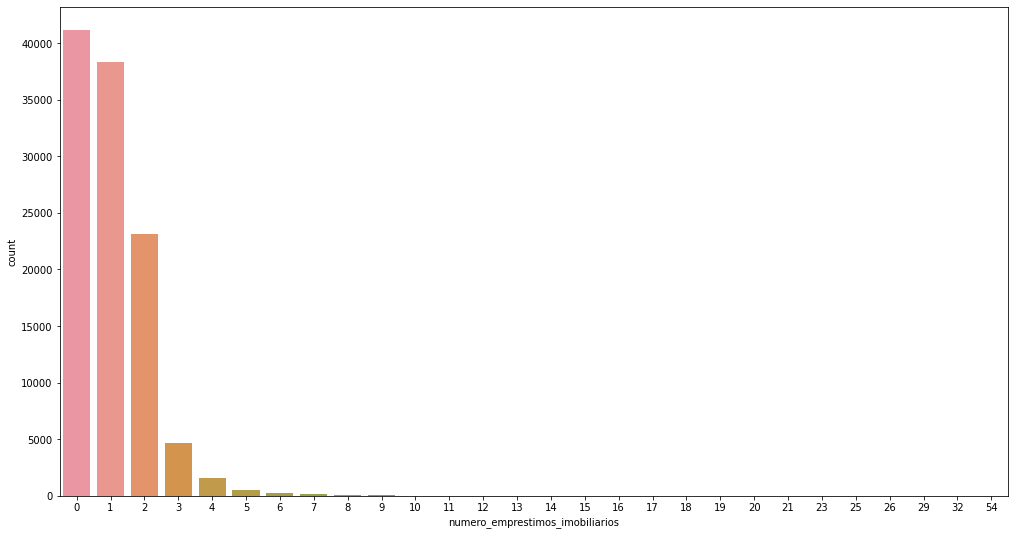

In [23]:
contagem('numero_emprestimos_imobiliarios')

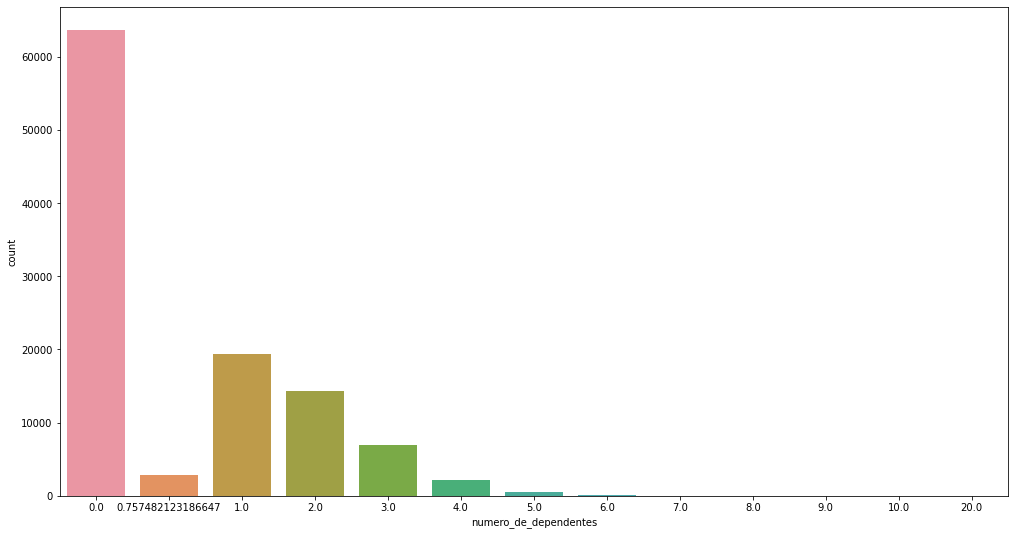

In [24]:
contagem('numero_de_dependentes')

# Há registros de clientes com 0.75 de dependentes. Pode ser um erro de digitação, mas vou apagá-los

In [25]:
# apagando esses registros
dados = dados[dados['numero_de_dependentes']!=0.757482123186647]

In [26]:
dados.shape

(107122, 11)

In [27]:
# criando 5 variáveis categoricas para analisar se algumas delas influencia a inadimplência ou não
dados['idade_grupo']=pd.cut(dados['idade'],bins=[17, 29, 49, 65,dados['idade'].max()],labels=['18-29', '30-49', '50-65', '>65'])
dados['salario_grupo']=pd.cut(dados['salario_mensal'],bins=[-1, 1000, 5000, 10000, dados['salario_mensal'].max()],labels=['0-1000','1000-5000', '5000-10000', '>10000'])
dados['linhas_aberto_grupo']=pd.cut(dados['numero_linhas_crdto_aberto'],bins=[-1, 5, 10, dados['numero_linhas_crdto_aberto'].max()],labels=['0-5','5-10','>10'])
dados['emprestimos_grupo']=pd.cut(dados['numero_emprestimos_imobiliarios'],bins=[-1, 0, 1, 2, 3, 4, 5, dados['numero_emprestimos_imobiliarios'].max()],labels=['0','1','2','3','4','5','>5'])
dados['n_dependentes_grupo']=pd.cut(dados['numero_de_dependentes'],bins=[-1, 0, 1, 2, 3, 4, 5, dados['numero_de_dependentes'].max()],labels=['0','1','2','3','4','5','>5'])

In [28]:
# verificando se criei valor missing
dados.isna().sum()

inadimplente                             0
util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
idade_grupo                              1
salario_grupo                            0
linhas_aberto_grupo                      0
emprestimos_grupo                        0
n_dependentes_grupo                      0
dtype: int64

In [29]:
# uma idade 0, vou apagar esse registro
dados[dados['idade']<18]

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,idade_grupo,salario_grupo,linhas_aberto_grupo,emprestimos_grupo,n_dependentes_grupo
65695,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0,NaN,5000-10000,5-10,2,2


In [30]:
dados.dropna(inplace=True)

In [31]:
def plot_grupo(x):
    sns.countplot(x = x, hue = 'inadimplente', data = dados, palette = 'ocean_r');

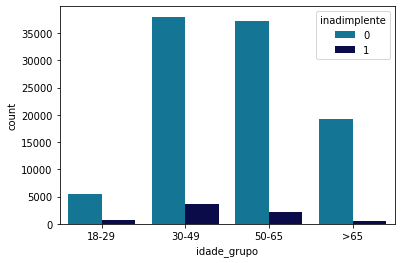

In [32]:
# olhando em que faixa etária mais se localizam os inadimplentes
plot_grupo('idade_grupo')

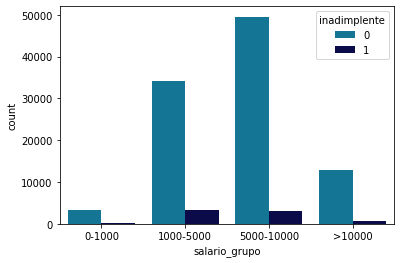

In [33]:
plot_grupo('salario_grupo')

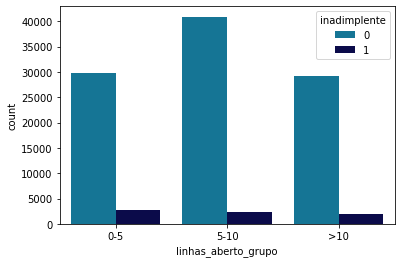

In [34]:
plot_grupo('linhas_aberto_grupo')

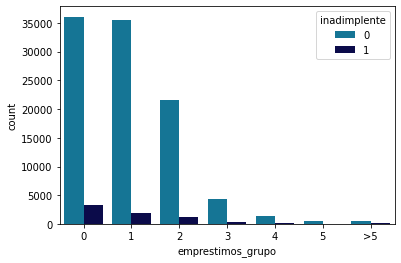

In [35]:
plot_grupo('emprestimos_grupo')

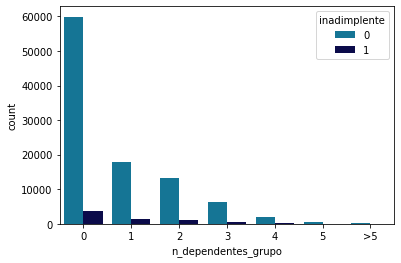

In [36]:
plot_grupo('n_dependentes_grupo')

In [37]:
def plot_idade_salario(y):
    sns.barplot(x = 'inadimplente', y = y, units = y, data = dados);    

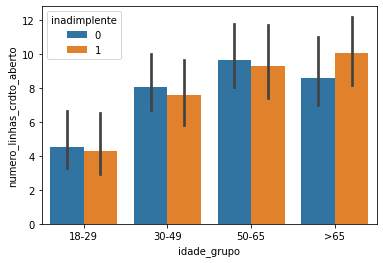

In [38]:
plot_idade_salario('idade_grupo','numero_linhas_crdto_aberto')

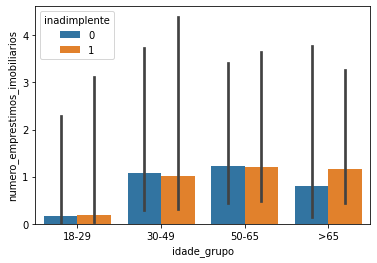

In [39]:
plot_idade_salario('idade_grupo','numero_emprestimos_imobiliarios')

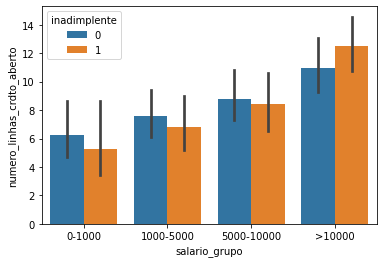

In [40]:
plot_idade_salario('salario_grupo','numero_linhas_crdto_aberto')

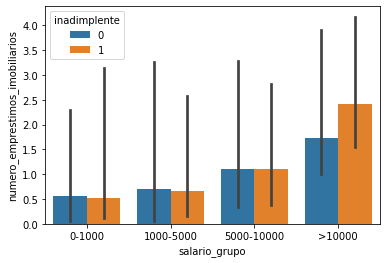

In [41]:
plot_idade_salario('salario_grupo','numero_emprestimos_imobiliarios')

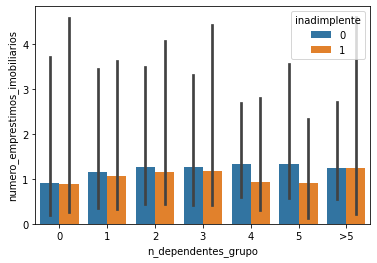

In [42]:
plot_idade_salario('n_dependentes_grupo','numero_emprestimos_imobiliarios')

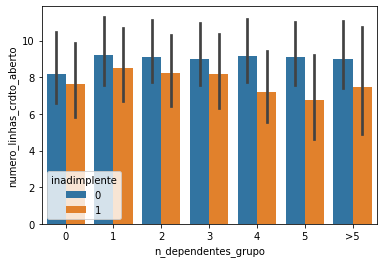

In [43]:
plot_idade_salario('n_dependentes_grupo','numero_linhas_crdto_aberto')

# Os inadimplentes estão em maior frequência na faixa etária de 30 a 49 anos e na faixa salarial de 1000 a 5000. Também em média têm acima de 4 linhas de crédito em aberto. Por fim, têm em média ao menos 1 empréstimo imobiliário e  1 dependente.

In [44]:
# dividindo os dados em preditores e target
# e balanceando os dados
from imblearn.over_sampling import SMOTE
preditores = dados.iloc[:,1:11]
target = dados.iloc[:,0]
sm = SMOTE()
preditores_balanceados, target_balanceados = sm.fit_resample(preditores,target)

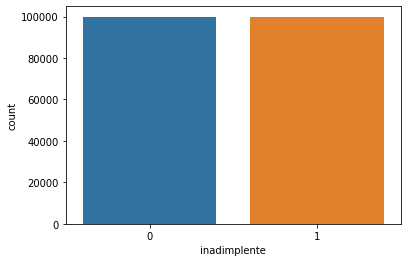

In [45]:
sns.countplot(target_balanceados);

In [46]:
preditores.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [47]:
# escalonamento dos dados
scaler = MinMaxScaler()
preditores_norm = scaler.fit_transform(preditores_balanceados)

In [48]:
# divisão em treino em teste
pred_treino,pred_teste,target_treino,target_teste = train_test_split(preditores_norm,target_balanceados,test_size=0.20)

In [49]:
pred_treino

array([[7.52395362e-07, 3.72093023e-01, 0.00000000e+00, ...,
        3.70370370e-02, 0.00000000e+00, 0.00000000e+00],
       [4.89401055e-06, 3.72093023e-01, 0.00000000e+00, ...,
        1.85185185e-02, 0.00000000e+00, 0.00000000e+00],
       [1.97207521e-05, 9.30232558e-02, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [7.36715321e-06, 2.67441860e-01, 0.00000000e+00, ...,
        3.70370370e-02, 1.02040816e-02, 1.00000000e-01],
       [0.00000000e+00, 5.81395349e-01, 0.00000000e+00, ...,
        1.85185185e-02, 0.00000000e+00, 0.00000000e+00],
       [3.12889829e-06, 2.32558140e-01, 1.02040816e-02, ...,
        3.70370370e-02, 0.00000000e+00, 0.00000000e+00]])

In [50]:
pred_teste

array([[1.97207521e-05, 6.74418605e-01, 2.04081633e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.87658890e-07, 4.30232558e-01, 0.00000000e+00, ...,
        1.85185185e-02, 0.00000000e+00, 0.00000000e+00],
       [2.84784600e-06, 8.13953488e-02, 0.00000000e+00, ...,
        1.85185185e-02, 0.00000000e+00, 8.23996973e-02],
       ...,
       [1.37363581e-05, 2.67441860e-01, 1.02040816e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.97207521e-05, 6.74418605e-01, 0.00000000e+00, ...,
        1.85185185e-02, 0.00000000e+00, 5.00000000e-02],
       [1.41182335e-05, 4.53488372e-01, 1.02040816e-02, ...,
        1.85185185e-02, 0.00000000e+00, 1.05281655e-01]])

In [51]:
target_treino.head()

5777      0
135290    1
71147     1
114674    1
80803     0
Name: inadimplente, dtype: int64

In [52]:
target_teste.head()

101641    0
38206     0
196973    1
79505     0
162762    1
Name: inadimplente, dtype: int64

In [53]:
pred_treino.shape

(159875, 10)

In [54]:
pred_teste.shape

(39969, 10)

In [55]:
target_treino.shape

(159875,)

In [56]:
target_teste.shape

(39969,)

In [57]:
# dicionários de parâmetros dos algoritmos
dicio_nb = {'priors':[None],'var_smoothing':[1e-11, 1e-10, 1e-9,1e-8,1e-7]}
dicio_floresta = {'n_estimators':[10,50,100],'criterion':['gini','entropy'],'max_depth':[1,10,50,100],'min_samples_leaf':[1,2,5,10],'min_samples_split':[1,5,10,20,50]}
dicio_knn = {'n_neighbors':[1,3,5,10,20,30],'weights':['uniform','distance'], 'metric':['euclidean','manhattan']}
dicio_lr = {'solver':['newton-cg', 'lbfgs', 'liblinear'],'C':[0.001,0.01,0.1,1,10]}
parametros = [dicio_nb,dicio_floresta,dicio_knn,dicio_lr]

In [58]:
# lista com os modelos e nomes
modelos = []
modelos.append(GaussianNB())
modelos.append(RandomForestClassifier())
modelos.append(KNeighborsClassifier())
modelos.append(LogisticRegression())
nomes = ['NB','RF','KNN','LR']

In [59]:
# iterando nas 3 listas
for nome,modelo,parametro in zip(nomes,modelos,parametros):
    classificador = GridSearchCV(modelo, parametro, n_jobs=-1)
    classificador.fit(pred_treino, target_treino)
    print('Maior Acurácia: %f usando %s %s'  % (classificador.best_score_, classificador.best_params_,nome))
    previsao = classificador.predict(pred_teste)
    print('Métricas:', classification_report(target_teste,previsao))
    print('Acurácia: %f' % (accuracy_score(target_teste,previsao)))
    print('-'*125)

Maior Acurácia: 0.516103 usando {'priors': None, 'var_smoothing': 1e-11} NB
Métricas:               precision    recall  f1-score   support

           0       0.51      1.00      0.67     20086
           1       0.89      0.04      0.07     19883

    accuracy                           0.52     39969
   macro avg       0.70      0.52      0.37     39969
weighted avg       0.70      0.52      0.37     39969

Acurácia: 0.518026
-----------------------------------------------------------------------------------------------------------------------------
Maior Acurácia: 0.912482 usando {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100} RF
Métricas:               precision    recall  f1-score   support

           0       0.92      0.92      0.92     20086
           1       0.92      0.92      0.92     19883

    accuracy                           0.92     39969
   macro avg       0.92      0.92      0.92     39969
weighted avg   

# A melhor performance foi com o Random Forest.

In [60]:
# escalonando os dados com outro scaler para testá-lo com o Rando Forest
scaler2 = StandardScaler()
preditores_norm2 = scaler2.fit_transform(preditores_balanceados)
pred_treino2,pred_teste2,target_treino2,target_teste2 = train_test_split(preditores_norm2,target_balanceados,test_size=0.20)

In [63]:
pred_treino2.shape

(159875, 10)

In [64]:
pred_teste2.shape

(39969, 10)

In [65]:
target_treino2.shape

(159875,)

In [66]:
target_teste2.shape

(39969,)

In [61]:
# Um pouco pior que o MinMax
modelo2 = RandomForestClassifier()
classificador2 = GridSearchCV(modelo2, dicio_floresta, n_jobs=-1)
classificador2.fit(pred_treino2, target_treino2)
print('Maior Acurácia: %f usando %s'  % (classificador2.best_score_, classificador2.best_params_))
previsao2 = classificador2.predict(pred_teste2)
print('Métricas:', classification_report(target_teste2,previsao2))
print('Acurácia: %f' % (accuracy_score(target_teste2,previsao2)))

Maior Acurácia: 0.906633 usando {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Métricas:               precision    recall  f1-score   support

           0       0.91      0.92      0.91     20024
           1       0.92      0.91      0.91     19945

    accuracy                           0.91     39969
   macro avg       0.91      0.91      0.91     39969
weighted avg       0.91      0.91      0.91     39969

Acurácia: 0.912057


# Nessa parte vou tentar fazer engenharia de atributos com os 2 scaler no Random Forest.

In [79]:
# criando listas para guardar os scores e número de ks para passar pro SelectKbest
score_treino_minmaxscaler = []
score_teste_minmaxscaler = []
n_k = list(range(2,10))

In [80]:
n_k

[2, 3, 4, 5, 6, 7, 8, 9]

In [72]:
df_treino = pd.DataFrame(pred_treino,columns=preditores.columns)
df_treino.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,7.523954e-07,0.372093,0.000000,0.000002,0.001163,0.362069,0.000000,0.037037,0.0,0.000000
1,4.894011e-06,0.372093,0.000000,0.013285,0.002206,0.241379,0.000000,0.018519,0.0,0.000000
2,1.972075e-05,0.093023,1.000000,0.000000,0.002206,0.000000,1.000000,0.000000,1.0,0.000000
3,1.975230e-05,0.197674,0.020408,0.000001,0.000911,0.051724,0.010204,0.000000,0.0,0.146561
4,9.567554e-06,0.267442,0.000000,0.000001,0.003387,0.155172,0.000000,0.018519,0.0,0.050000


In [73]:
df_teste = pd.DataFrame(pred_teste,columns=preditores.columns)
df_teste.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1.972075e-05,0.674419,0.020408,9.396364e-07,0.000395,0.086207,0.000000,0.000000,0.0,0.0000
1,5.876589e-07,0.430233,0.000000,3.224969e-07,0.001994,0.120690,0.000000,0.018519,0.0,0.0000
2,2.847846e-06,0.081395,0.000000,2.046746e-06,0.001329,0.120690,0.000000,0.018519,0.0,0.0824
3,6.800577e-06,0.244186,0.020408,1.004218e-06,0.004570,0.103448,0.000000,0.037037,0.0,0.1500
4,1.470524e-05,0.104651,0.000000,6.906916e-07,0.001064,0.034483,0.010204,0.000000,0.0,0.0000


In [74]:
df_treino2 = pd.DataFrame(pred_treino2,columns=preditores.columns)
df_treino2.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,-0.021168,0.663080,-0.136345,-0.189683,-0.194632,-0.587342,-0.111671,-0.759109,-0.098209,-0.782276
1,-0.021636,-0.569036,-0.136345,-0.189589,-0.096121,-0.192023,-0.111671,0.972803,-0.098209,2.000741
2,-0.016856,-0.061694,-0.136345,1.681037,0.038716,0.005636,0.013631,0.972803,-0.098209,-0.782276
3,-0.016856,-0.061694,-0.136345,-0.119805,0.038716,-1.377979,-0.111671,-0.759109,-0.098209,-0.782276
4,-0.022048,2.837403,-0.136345,-0.189689,-0.204969,0.203295,-0.111671,0.106847,-0.098209,-0.782276


In [75]:
df_teste2 = pd.DataFrame(pred_teste2,columns=preditores.columns)
df_teste2.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,-0.017840,0.010784,-0.136345,-0.189383,-0.157253,1.389250,-0.111671,0.972803,-0.098209,0.294675
1,-0.016918,1.025467,0.615215,-0.189496,-0.177984,0.796272,-0.111671,-0.759109,-0.098209,-0.732775
2,-0.022060,0.300693,-0.136345,-0.189688,-0.047847,1.191591,-0.111671,-0.759109,-0.098209,-0.782276
3,-0.016856,-0.713991,-0.136345,-0.090184,0.038716,-1.575638,-0.111671,-0.759109,-0.098209,-0.782276
4,-0.021411,-1.728674,-0.136345,-0.189625,-0.345872,-0.982660,-0.111671,-0.759109,-0.098209,-0.782276


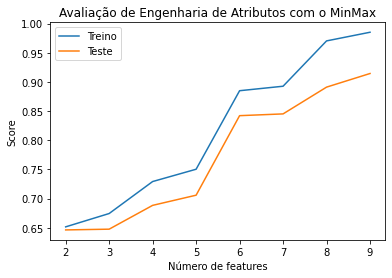

In [86]:
for k in n_k:
    f = SelectKBest(k=k)
    fit = f.fit(df_treino,target_treino)
    features = fit.transform(df_treino)
    cols = fit.get_support(indices=True)
    modelo3 = RandomForestClassifier(criterion = 'entropy', max_depth = 50, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
    modelo3.fit(df_treino.iloc[:,cols],target_treino)
    score_treino_minmaxscaler.append(modelo3.score(df_treino.iloc[:,cols],target_treino))
    previsao3 = modelo3.predict(df_teste.iloc[:,cols])
    score_teste_minmaxscaler.append(accuracy_score(target_teste,previsao3))



plt.plot(n_k,score_treino_minmaxscaler,n_k,score_teste_minmaxscaler)
plt.xlabel('Número de features')
plt.ylabel('Score')
plt.title('Avaliação de Engenharia de Atributos com o MinMax')
plt.legend(['Treino','Teste'])
plt.show()

In [87]:
score_teste_minmaxscaler

[0.6461757862343316,
 0.6474517751257224,
 0.6882834196502289,
 0.7057219344992369,
 0.8421026295378918,
 0.8451299757311916,
 0.8910405564312343,
 0.9144086667167054]

In [88]:
score_treino_standardscaler = []
score_teste_standardscaler = []

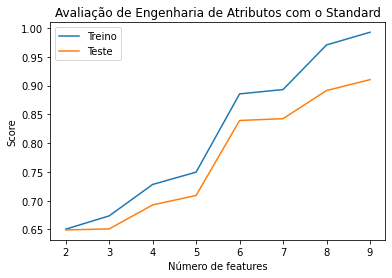

In [89]:
for k in n_k:
    f_classif2 = SelectKBest(k=k)
    fit2 = f_classif2.fit(df_treino2,target_treino2)
    features = fit2.transform(df_treino2)
    cols2 = fit2.get_support(indices=True)
    modelo4 = RandomForestClassifier(criterion = 'entropy', max_depth = 50, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
    modelo4.fit(df_treino2.iloc[:,cols2],target_treino2)
    score_treino_standardscaler.append(modelo4.score(df_treino2.iloc[:,cols2],target_treino2))
    previsao4 = modelo4.predict(df_teste2.iloc[:,cols2])
    score_teste_standardscaler.append(accuracy_score(target_teste2,previsao4))



plt.plot(n_k,score_treino_standardscaler,n_k,score_teste_standardscaler)
plt.xlabel('Número de features')
plt.ylabel('Score')
plt.title('Avaliação de Engenharia de Atributos com o Standard')
plt.legend(['Treino','Teste'])
plt.show()

# Vou ficar com o primeiro modelo com minmaxscaler e todos os atributos, pois apesar de no treino com 9 atributos com os 2 scaler serem melhores do que o 1° modelo, no teste o 1° modelo performar melhor.

In [97]:
model = RandomForestClassifier(criterion = 'entropy', max_depth = 50, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
model.fit(pred_treino, target_treino)
previsoes = model.predict(pred_teste)
print('Métricas:', classification_report(target_teste,previsoes))

Métricas:               precision    recall  f1-score   support

           0       0.92      0.92      0.92     20086
           1       0.92      0.92      0.92     19883

    accuracy                           0.92     39969
   macro avg       0.92      0.92      0.92     39969
weighted avg       0.92      0.92      0.92     39969



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

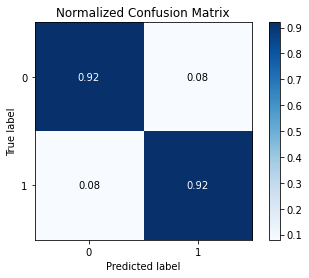

In [99]:
plot_confusion_matrix(target_teste,previsoes,normalize=True)

In [91]:
testdata = pd.read_csv('teste.csv',header=0)

In [93]:
testdata.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0


In [92]:
prev_data = testdata.copy()

In [94]:
prev_data.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0


In [101]:
prev_data.isna().sum()

util_linhas_inseguras                       0
idade                                       0
vezes_passou_de_30_59_dias                  0
razao_debito                                0
salario_mensal                           7968
numero_linhas_crdto_aberto                  0
numero_vezes_passou_90_dias                 0
numero_emprestimos_imobiliarios             0
numero_de_vezes_que_passou_60_89_dias       0
numero_de_dependentes                    1046
dtype: int64

In [102]:
mean_salario = prev_data['salario_mensal'].mean()
mean_n_dependentes = prev_data['numero_de_dependentes'].mean()
prev_data['salario_mensal'].fillna(value=mean_salario, inplace=True)
prev_data['numero_de_dependentes'].fillna(value=mean_n_dependentes, inplace=True)

In [103]:
prev_data.isna().sum()

util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

In [104]:
prevdata_norm = scaler.fit_transform(prev_data)

In [105]:
inadimplente = model.predict(prevdata_norm)

In [106]:
testdata['inadimplente'] = inadimplente

In [107]:
testdata.head()

,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes,inadimplente
0,0.025849,62,0,0.081775,8180.0,3,0,2,0,0.0,0
1,0.667083,55,0,0.153112,2200.0,3,0,0,0,0.0,1
2,0.007093,44,0,0.148800,7499.0,20,0,1,0,0.0,0
3,0.091213,54,0,0.351635,5900.0,15,0,1,1,0.0,0
4,0.112680,54,0,0.065959,2167.0,3,0,0,0,0.0,0


In [108]:
testdata.to_csv('teste.csv')